![example](images/director_shot.jpeg)

# Movie Analysis

**Authors:** Wesley Yu
***

## Overview

This project analyzes data from various movie databases. Exploratory data analysis of the database shows how trends in movie release dates, genres, and production budget can effect the movie's worldwide box office results. Microsoft can use this analysis to help decide which film projects to take on.

## Business Problem

Microsoft is taking their first step into the movie business and will need to sift through an enourmous amount of scripts 
to find a profitable project to take on. Using data from movie databases, we can find patterns and trends that can help Microsoft narrow down their choices.


## Data Understanding

In this project, we will be looking at datasets from two sources. The Numbers and TMDB.
The Numbers has been tracking data about the movie industry since 1997, having the most up to date information on box office numbers and movie financials.
TMDB is a community built and backed database on movies and TV shows. Data is constanly added and updated by a strong community that is passionate about movie and TV show data.

The Numbers dataset we are working with has records from 1915 to 2020. Data on various movie's production budget, domestic, and worldwide gross box office numbers are included.

TMDB dataset includes records from 1930 to 2020. Every movie has a unique TMDB ID associated to them. The dataset provides
genre ids, popularity, and movie rating based off their community.

We will be combining these two datasets to match movie financials with there respective genres and ratings.


In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import json

%matplotlib inline

In [2]:
# Here you run your code to explore the data
numdf = pd.read_csv('Data/tn.movie_budgets.csv.gz')
print(numdf.info())
numdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [ ]:
numdf.value_counts(['release_date', 'movie'])

In [3]:
tmdf = pd.read_csv('Data/tmdb.movies.csv.gz')
print(tmdf.info())
tmdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
None


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [4]:
numdf['release_date'] = pd.to_datetime(numdf['release_date'])
tmdf['release_date'] = pd.to_datetime(tmdf['release_date'])

## Data Preparation

### Data Cleaning 

For both datasets, I check for any duplicates and drop them if found. Unnecessary columns are dropped and column names are renamed to make working on them easier.

In [5]:
# Drop uneccessary columns
numdf = numdf.drop(columns = ['id', 'domestic_gross'])

In [6]:
# Drop uneccessary columns
tmdf = tmdf.drop(columns = ['Unnamed: 0', 'original_language', 'title', 'popularity', 'vote_count'])

# Drop duplicates by their unique TMDB ID
tmdf = tmdf.drop_duplicates(subset = 'id', keep = 'first')

In [7]:
# Rename movie title column to same name
numdf = numdf.rename(columns = {'movie': 'title'})
tmdf = tmdf.rename(columns = {'original_title': 'title'})

### Merging Datasets

After merging datasets, I change the <code>production_budget</code> and <code>worldwide_gross</code> to <code>int</code> datatype.

In [8]:
# Merge Numbers and TMDB on title and release date
df = numdf.merge(tmdf, on = ['title', 'release_date'])

In [9]:
# Change datatype of worldwide and prodction from string to int
df['production_budget'] = df['production_budget'].map(lambda x: int(x.strip('$').replace(',','')))
df['worldwide_gross'] = df['worldwide_gross'].map(lambda x: int(x.strip('$').replace(',','')))

In [10]:
# Change genre id from a list within a string to a list of strings
df['genre_ids'] = df['genre_ids'].str.strip('[]').str.split(', ') 

## Data Analysis

I focus on three variables (<code>release_date</code>, <code>genre_ids</code>, and <code>production_budget</code>) and find a pattern with respect to <code>worldwide_gross</code>

#### Seasonal releases

I create a <code>month</code> feature to group up the release dates by months. Based on the results, movies release during the months of May, June, July, November, and December have a higher average worldwide box office gross. These months are concurrent with the summer and holiday seasons.

In [18]:
# Create new column 'month' that returns the month of each release date
df['month'] = df['release_date'].dt.strftime('%b')

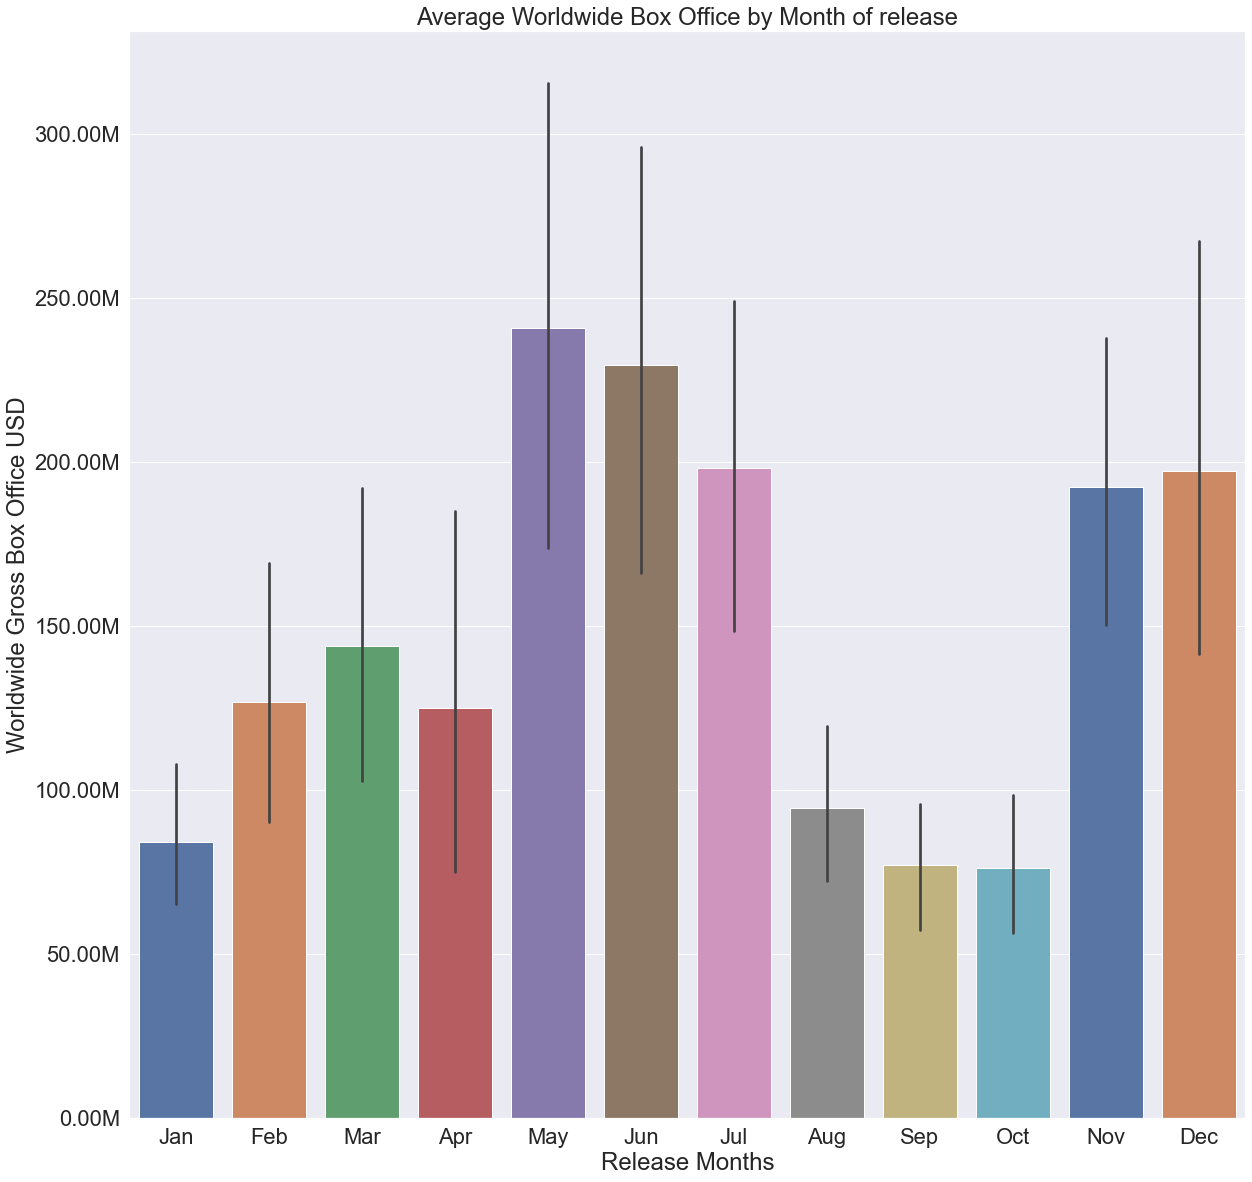

In [19]:
# Seaborns barplot allows us to plot categorical data and show the mean value of each category. 
order_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.set_style('darkgrid')
sns.set(font_scale = 2)
plt.figure(figsize = (20,20))
ax = sns.barplot(x = 'month', y = 'worldwide_gross', data = df, palette = 'deep', order = order_list)
ax.set_title('Average Worldwide Box Office by Month of release')
ax.set(xlabel = 'Release Months', ylabel = 'Worldwide Gross Box Office USD')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))
plt.show()

#### Genres

Movies with the adventure sub-genre associated to them have highest average worldwide box office gross. Followed by animation and fantasy.

In [11]:
# Seperate sub genres in movies and count them as a movie in each genre.
genre_data = df.explode('genre_ids')

In [12]:
# Group movies by their genre while averaging the worldwide_gross
grouped_genre = genre_data.groupby('genre_ids')['worldwide_gross'].mean()

In [13]:
# create a list to change genre ids into their respective names
# genre list found in TMDB API documentation
genre_list = {'28': 'Action', '12': 'Adventure', '16': 'Animation', '35': 'Comedy', '80': 'Crime', '99': 'Documentary',\
              '18': 'Drama', '10751': 'Family', '14': 'Fantasy', '36': 'History', '27': 'Horror', '10402': 'Music',\
              '9648': 'Mystery', '10749': 'Romance', '878': 'Sci-Fi', '10770': 'TV Movie', '53': 'Thriller', '10752': 'War',\
              '37': 'Western', '': 'No Genre'}
grouped_genre = grouped_genre.rename(index = genre_list)

In [14]:
# Sort by worldwide_gross by decsending value
grouped_genre = grouped_genre.sort_values(ascending = False)

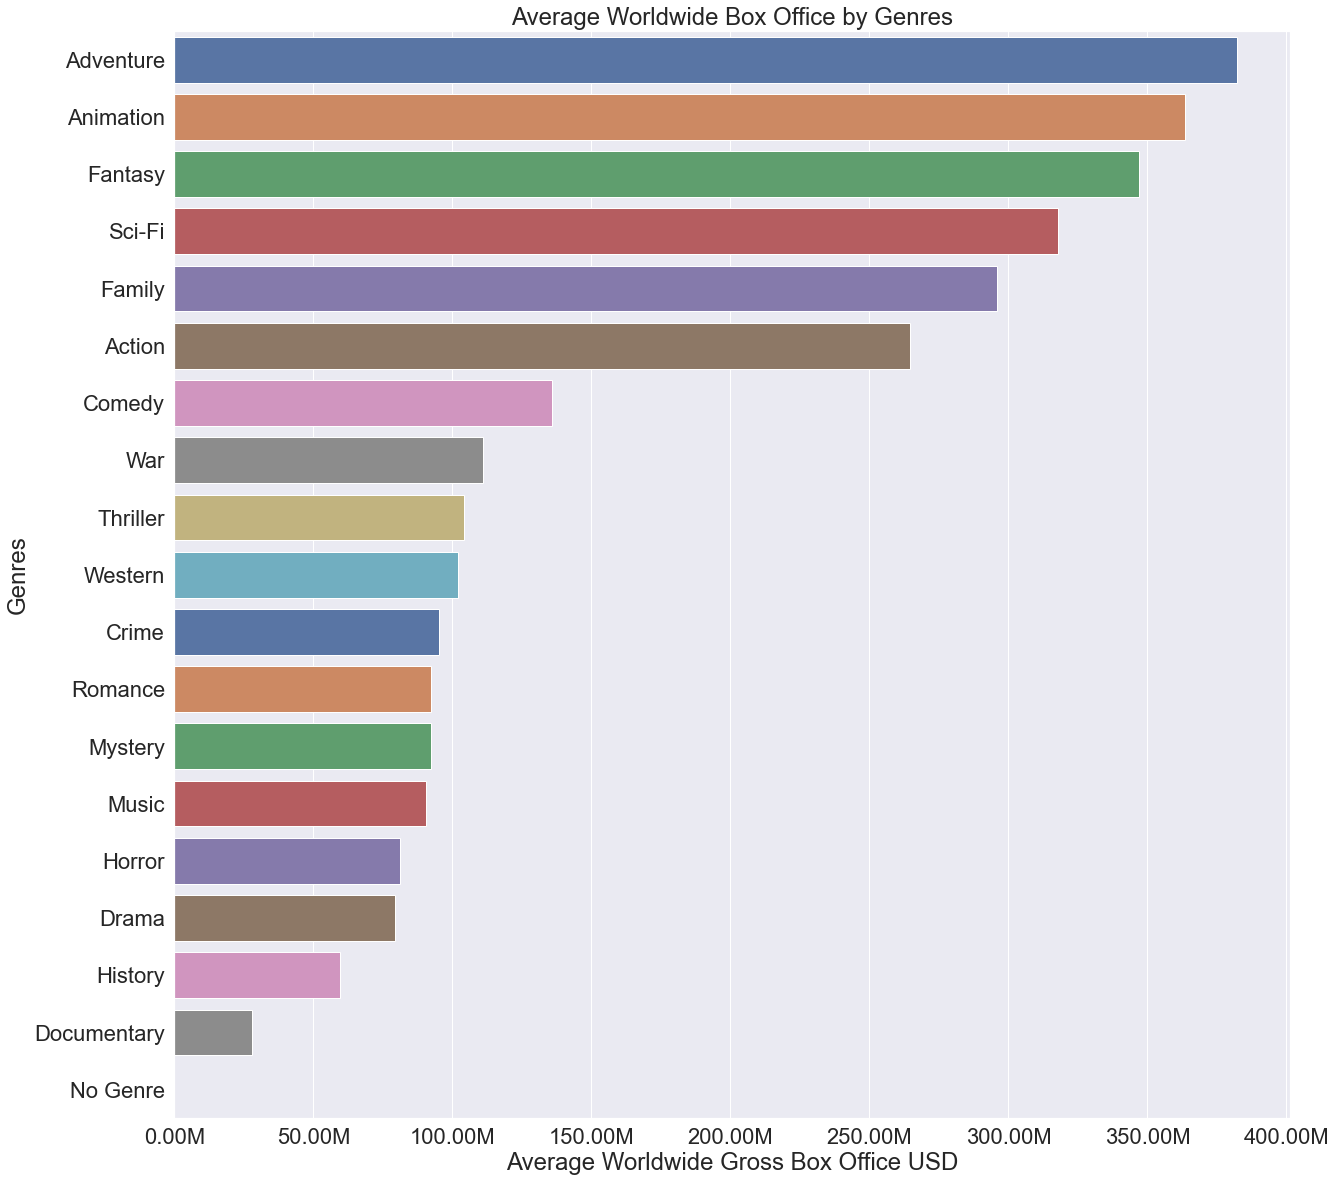

In [15]:
# Plot results
sns.set_style('darkgrid')
sns.set(font_scale = 2)
plt.figure(figsize = (20,20))
ax = sns.barplot(x = grouped_genre, y = grouped_genre.index , palette = 'deep')
ax.set_title('Average Worldwide Box Office by Genres')
ax.set(ylabel = 'Genres', xlabel = 'Average Worldwide Gross Box Office USD')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))
plt.show()

#### Production Budget

A positive correaltion is found between <code>production_budget</code> and <code>worldwide_gross</code>. This shows that higher production budgets tend to result in higher worldwide box office results.

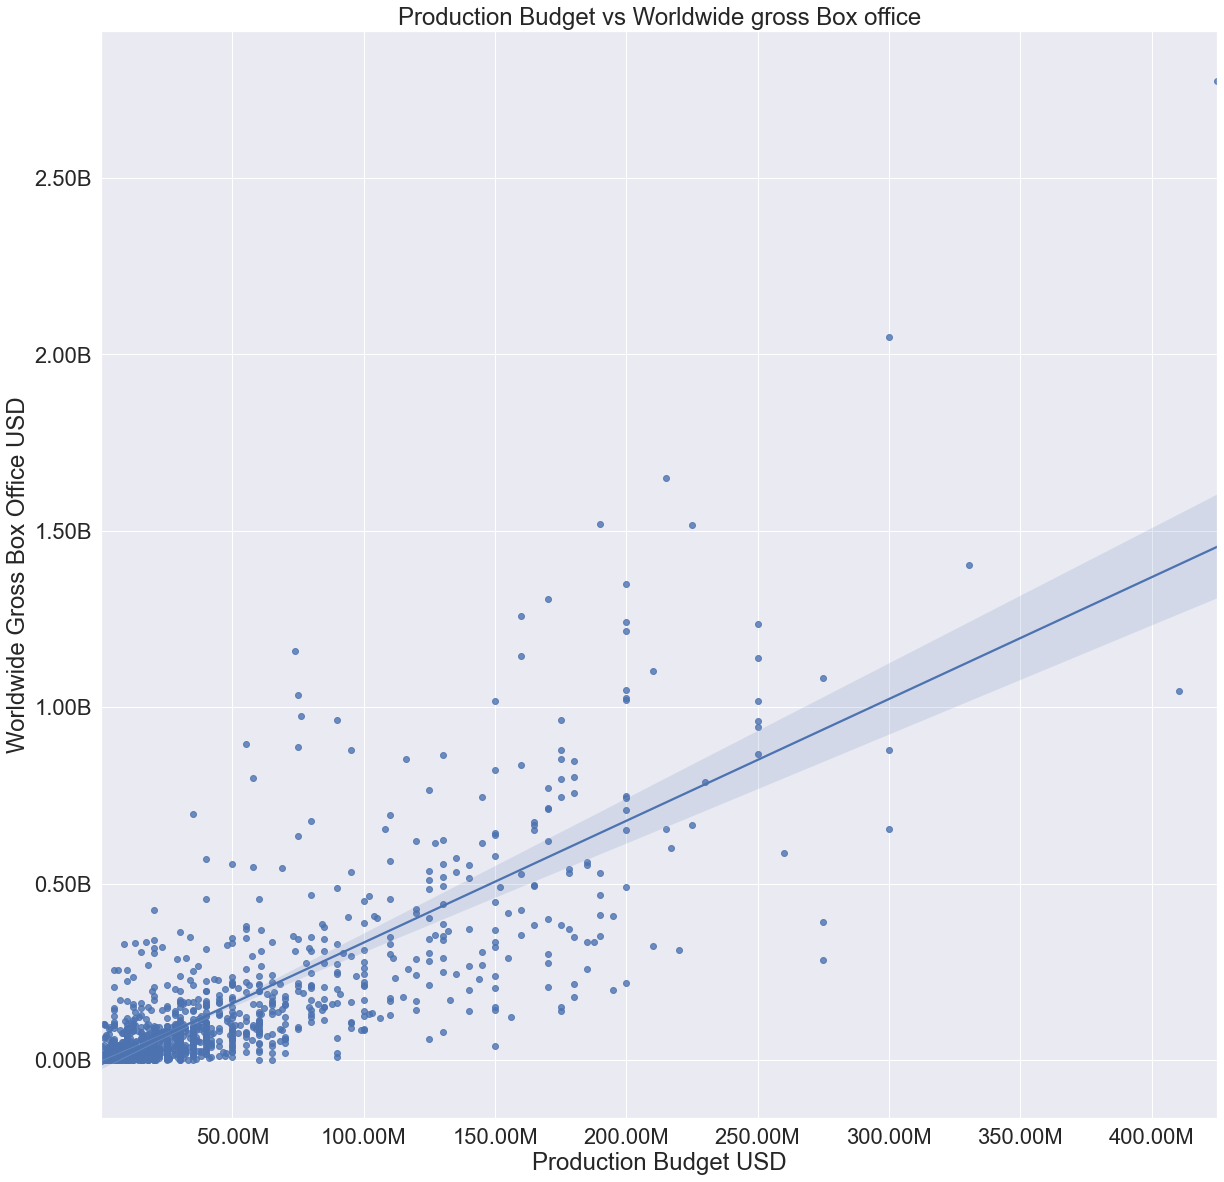

In [17]:
# Create Plot
sns.set_style('darkgrid')
sns.set(font_scale = 2)
plt.figure(figsize = (20,20))
ax = sns.regplot(x = 'production_budget', y = 'worldwide_gross', data = df)
ax.set_title('Production Budget vs Worldwide gross Box office')
ax.set(xlabel = 'Production Budget USD', ylabel = 'Worldwide Gross Box Office USD')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000000) + 'B'))
plt.show()

## Conclusions

This analysis leads to three recommendations to help Microsoft in deciding what movies to make:

- __Consider release date of movie.__ The months leading up to summer and the end of year holiday months have shown to have brought back higher box office totals.

- __Adventure as the go to genre for movies with high box office totals.__ While there are alot of different genres and sub genres in movies now. Movies with higher box office totals have an adventure aspect to them.

- __People want to see expensive movies.__ Investment pays off. Bringing in high quality directors and actors/actresses will entice people to want to see the movie.

There are many variables to examine to predict box office success of a movie. This analysis only looked at three of them.
 
## Next Steps

Further data and analysis can help Microsoft narrow down their decision making.

- __Marketing plays a big part in movie sucess.__  Examing this data could give insights on how audiences respond to different marketing techniques when promoting a movie.
- __Analysis of MPAA ratings.__ Analyzing this data could help decide what rating the movie should aim for.
